In [5]:
def I(t, v = 1, alpha = 1):
    return alpha*v*t

def check_event(In, t, thresh = 1):
    if In > thresh:
        return t
    else:
        return None
    
import numpy as np

def simulate_event_rate(total_time = 100000, 
                        sampling_step = 1e-3,
                        v = 1,
                        alpha = 1,
                       ):

    ts = 0,
    events = 0

    for t in np.arange(0,total_time,sampling_step):
        I_ = I(t-ts, v, alpha)
        if (t_event := check_event(I_, t)) is not None:
            ts = t_event
            events += 1
        
    return events/total_time

alphas = []
event_rates_arr = []
for alpha in np.arange(0,100,10):
    event_rates = np.array([[v, simulate_event_rate(v, alpha = alpha)] for v in np.arange(0.01,1,0.01)])
    event_rates_arr.append(event_rates)
    alphas.append(alpha)

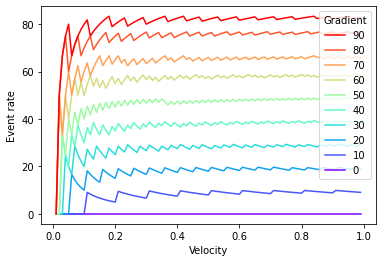

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

ax = plt.subplot(111)

color = iter(cm.rainbow(np.linspace(0, 1, len(alphas))))

for alpha, event_rates in zip(alphas, event_rates_arr):
    ax.plot(event_rates[:,0], event_rates[:,1], c = next(color), label = alpha)
    #plt.hold()
    
plt.xlabel("Velocity")
plt.ylabel("Event rate")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right', title = "Gradient", fancybox = True)
